In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

california = fetch_california_housing()

### Explore the Data

In [2]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Preprocess the Data

In [5]:
california_df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [6]:
scaler = MinMaxScaler()
print(scaler.fit(california_df))

MinMaxScaler()


### Categorical Variables:

In [7]:
labels = ["New","Old","Very Old"]
age = pd.cut(california_df['HouseAge'].value_counts(), bins=3, labels=labels)

In [8]:
x = pd.get_dummies(age).astype(int)
x.head()

,New,Old,Very Old
HouseAge,,,
52.0,0,0,1
36.0,0,0,1
35.0,0,1,0
16.0,0,1,0
17.0,0,1,0


In [9]:
result_df = pd.merge(california_df, x, on='HouseAge')
result_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,New,Old,Very Old
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,0,0
1,2.4038,41.0,4.495798,1.033613,317.0,2.663866,37.85,-122.28,1.075,1,0,0
2,1.1108,41.0,4.473611,1.184722,1959.0,2.720833,37.82,-122.27,0.975,1,0,0
3,5.9560,41.0,6.851064,1.079787,794.0,2.111702,37.83,-122.24,3.661,1,0,0
4,1.6121,41.0,3.561743,1.135593,1062.0,2.571429,37.80,-122.25,1.714,1,0,0


### Correlations:

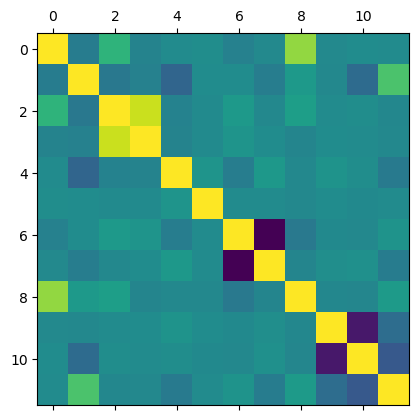

In [10]:
y = result_df.corr()
plt.matshow(y);

### Part II

In [11]:
california_df.head()
california_df['HouseAge']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

In [12]:
california_house_age = california_df['HouseAge']
california_df

new = california_df[california_house_age <= 10]
old = california_df[california_df['HouseAge'].between(11, 30)]
very_old = california_df[california_house_age > 30]
very_old.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,2.815


In [13]:
median = california_df['MedHouseValue'].median()

### Part III

In [14]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
pd.cut(california_df['MedInc'], 5)

0          (6.3, 9.2]
1          (6.3, 9.2]
2          (6.3, 9.2]
3          (3.4, 6.3]
4          (3.4, 6.3]
             ...     
20635    (0.485, 3.4]
20636    (0.485, 3.4]
20637    (0.485, 3.4]
20638    (0.485, 3.4]
20639    (0.485, 3.4]
Name: MedInc, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.485, 3.4] < (3.4, 6.3] < (6.3, 9.2] < (9.2, 12.1] < (12.1, 15.0]]